# Cosmograph Visualization

In [1]:
import sys
import subprocess

try:
    import cosmograph
    print("cosmograph already installed")
except ImportError:
    print("Installing cosmograph...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "cosmograph"])
    import cosmograph
    print("cosmograph installed!")

import pandas as pd
import numpy as np
from pathlib import Path

cosmograph already installed


# Analysis of Textual Strategies

In [2]:
# Load textual clustering results
print("Loading textual clustering results...")
df_text = pd.read_csv('../output/clustering/textual_clustering_results.csv')

# Prepare points data for cosmograph
points_text = pd.DataFrame({
    'id': range(len(df_text)),
    'x': df_text['x'],
    'y': df_text['y'],
    'label': df_text['id'],
    'category': df_text['cluster_label'],
    'cluster': df_text['cluster'],
    'text': df_text['text'].str[:200]
})

print(f"Text data: {len(points_text)} points")
print(f"Clusters: {points_text['category'].nunique()}")

# Create cosmograph widget for text
from cosmograph import cosmo

print("\nCreating Cosmograph for textual features...")
widget_text = cosmo(
    points=points_text,
    point_id_by='id',
    point_x_by='x',
    point_y_by='y',
    point_color_by='category',
    point_label_by='label',
    point_include_columns=['text', 'cluster']
)

widget_text

Loading textual clustering results...
Text data: 269 points
Clusters: 11

Creating Cosmograph for textual features...


Cosmograph(background_color=None, components_display_state_mode=None, focused_point_ring_color=None, hovered_p…

In [3]:
# Extract 10 samples from each cluster and save to CSV
output_dir = Path('../output/clustering/samples')
output_dir.mkdir(parents=True, exist_ok=True)

sample_rows = []
n_samples = 10

for cluster_id in sorted(df_text['cluster'].unique()):
    if cluster_id == -1:
        continue
    
    cluster_data = df_text[df_text['cluster'] == cluster_id]
    cluster_label = cluster_data['cluster_label'].iloc[0]
    cluster_size = len(cluster_data)
    
    n = min(n_samples, len(cluster_data))
    samples = cluster_data.sample(n=n, random_state=42)
    
    for sample_idx, (_, row) in enumerate(samples.iterrows(), 1):
        sample_rows.append({
            'cluster': cluster_id,
            'cluster_label': cluster_label,
            'cluster_size': cluster_size,
            'sample_number': sample_idx,
            'id': row['id'],
            'text': row['text'],
            'x': row['x'],
            'y': row['y']
        })

samples_df = pd.DataFrame(sample_rows)
output_file = output_dir / 'textual_cluster_samples.csv'
samples_df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"Saved {len(sample_rows)} samples to {output_file}")

Saved 100 samples to ..\output\clustering\samples\textual_cluster_samples.csv


In [10]:
# # Extract 10 samples from each cluster for interpretation
# print("\n=== Textual Cluster Samples ===")
# for cluster_id in sorted(df_text['cluster'].unique()):
#     if cluster_id == -1:
#         continue
#     cluster_data = df_text[df_text['cluster'] == cluster_id]
#     samples = cluster_data.sample(n=min(10, len(cluster_data)), random_state=42)
    
#     print(f"\n{cluster_data['cluster_label'].iloc[0]} (size: {len(cluster_data)}):")
#     for idx, row in samples.iterrows():
#         print(f"  - {row['id']}: {row['text'][:100]}...")

## Cluster 0: The Medicalization of Beauty

This cluster uniquely focuses on one product, framing beauty not as enhancement but as a **medical cure** for a "disease" or "defect."

### Textual Strategies

* **Problem-Agitation:** Uses strong negative language, calling ugliness a "great defect in life" (人生之一大缺陷).
* **Medical/Curative Language:** Employs terms like "treat" (主治), "disease" (皮肤病), and "cure" (治).
* **Appeal to Potency & Ingredients:** Highlights "special effectiveness" (特别灵验), "fast results" (功效的确神速), and specific ingredients ("sheep-fat pearl powder" / 羊脂珠粉).
* **Establish Authority:** Leverages history ("sold for 25 years" / 行销廿五年) and global reach ("in China and foreign countries" / 在中外各国) to build trust.

### Constructing "Beauty"

* **Beauty as Flawlessness:** The goal is to "change ugliness to beauty" (改丑陋为姣艳).
* **Ideal:** The name "Mirror Face" (镜面) implies the ideal of a perfectly smooth, clear, blemish-free surface.
* **Method:** Beauty is achieved by *removing* medical problems (freckles, acne, rough skin).

### Mediating "Femininity"

* **Femininity as Responsibility:** Implies a woman's duty to "cure" her appearance.
* **Psychological Burden:** Links a flawless face (achieved via "treatment") to social and personal virtue.

### Context (Semi-Colonial Shanghai)

* **Hybridity:** Blends traditional Chinese medical concepts (黑气) with Western-style ad claims of potency and global sales.
* **Urban Anxiety:** Preys on the social anxiety of a modern city where appearance (面貌) holds increasing social value.
* Values **health and flawlessness** over overt glamour or "modernity."

## Cluster 1: Beauty as Physiognomy and Fortune

This cluster, also for "镜面散," employs a distinct textual strategy: **linking facial complexion directly to traditional beliefs in physiognomy (面相), destiny, and socio-economic success.**

### Textual Strategies

* **Appeal to Physiognomy/Superstition:** The headline "Facial Complexion and Financial Fortune" (面色与财运) sets the theme.
* **Causation of Success:** Explicitly states a "rosy complexion *will* lead to strong financial fortune" (面色红润财运必旺) and "fame and profit" (名利两全).
* **Problem Framing:** A bad complexion (dark, gloomy, blemishes) is framed as a *symptom and cause* of "adversity" (逆境).
* **Medical + Mystical:** It retains the medical language of Cluster 0 ("treats" / 专治, listing blemishes) but re-frames the *purpose* of the cure: to restore good fortune, not just fix a "defect."
* **Strong Guarantee:** "Money back if it's not effective" (不灵包退) to build trust in a bold, supernatural-adjacent claim.

### Constructing "Beauty"

* **Beauty as an Omen:** A "rosy" (红润) and "smooth as a mirror" (光滑如镜) face is constructed as a *prerequisite and signifier* of a good life (wealth and fame).
* **Beauty as Agency:** The product offers the user the power to *change their destiny* by "curing" the physical manifestation of misfortune.
* **Ideal:** The ideal is a "colorful" (丰彩) and "bright" complexion, contrasted with the "dark and gloomy" (暗晦) face of adversity.

### Mediating "Femininity"

* **Socio-Economic Burden:** This strategy expands the burden on women. Her appearance is now tied not just to her personal "defect" (Cluster 0), but to the entire household's **financial well-being (财运) and social status (名利)**.
* **Mediator of Fortune:** The (implied female) user becomes the agent responsible for securing the family's "luck" by maintaining her face.

### Context (Semi-Colonial Shanghai)

* **Hybridity (Modernity + Tradition):** This is a prime example of hybridity. It sells a modern, mass-produced commodity (a cosmetic) by appealing to deep-seated, traditional beliefs in fortune and physiognomy.
* **Urban Capitalism:** In the precarious, competitive, and wealth-focused environment of 1920s Shanghai, an ad that commodifies hope and promises "fame and profit" would be powerfully resonant.

## Cluster 2: Beauty as Western Scientific Modernity

This cluster pivots from tradition (Cluster 1) to **Western science, speed, and modernity** as the primary source of authority and efficacy.

### Textual Strategies

* **Appeal to Western Scientific Authority:**
    * "America's newest invention" (美国最新发明).
    * Made by a "Medical Doctor from an American... University" (美国...医药博士).
    * Sold by a "Yanghang" (foreign trading firm - 哈生洋行) or "Pacific Pharmacy" (太平洋药房).
* **Medical/Pharmaceutical Framing:** Products are "medicine powder" (药粉) or made by a "Medical Doctor" (医学博士).
* **Promise of Speed & Transformation:** The brand name "One-Night" (一夜) and the claim "effective within 24 hours" (二十四小时内) are key.
* **Specific, Modern Sensory Claims:** Emphasizes texture ("like snow" / 质如霜雪), scent ("fragrant" / 芬芳扑鼻), and feel ("no oil" / 无油).
* **Explicit "Whitening" Goal:** "Sovereign Cream" (统治霜) explicitly aims to "bleach the face" (漂白脸面).

### Constructing "Beauty"

* **Beauty as a Scientific Achievement:** Beauty is achieved through modern, Western "inventions," contrasting with traditional methods or cures.
* **Beauty as Rapid Change:** The "one-night" promise reframes beauty as an immediate, visible transformation, not a slow cure.
* **The Ideal (Modern/Western):** The goal is "delicate" (细腻), "tender" (娇嫩), and explicitly "white" (漂白), reflecting a modern, and possibly Western-influenced, aesthetic ideal.

### Mediating "Femininity"

* **The Modern Consumer:** This strategy targets a woman who sees herself as a modern consumer, one who trusts science ("Mr. Science") and desires fast, visible results.
* **Cosmopolitan Identity:** Using a "newest American invention" from a *Yanghang* helps construct a cosmopolitan identity, aligning the user with global trends prevalent in Shanghai.
* **Note on Gender:** "One-Night" powder is explicitly "loved by men and women" (男女爱用), suggesting a nascent universal, modern appeal, though the primary context remains feminine beauty.

### Context (Semi-Colonial Shanghai)

* **Reverence for "Mr. Science":** Directly leverages the cultural authority of Western science and medicine that was prominent in post-May Fourth urban China.
* **Commodifying Speed:** The "24-hour" claim reflects the accelerated pace of life and desire for quick, modern solutions in a bustling metropolis.
* **Western Concessions:** The authority of "America" and *Yanghangs* was reinforced by the physical and economic presence of foreign concessions in Shanghai.

## Cluster 3: Beauty as a Multi-Faceted Project (Whitening, Hairlessness, and Youth)

This cluster, advertising a "Key to Beauty," groups multiple, specialized products. It constructs beauty as a complex project requiring a **"toolbox" of solutions** for different, specific problems.

### Textual Strategies

* **Appeal to Western Authority (German):** "Invented by Germany's Rosen-shi" (德国罗森氏所发明). This shifts the authority from "America" (Cluster 2) to "Germany," still leveraging Western scientific prestige.
* **Product Segmentation:** Offers a *suite* of products for distinct problems:
    1.  **美容丸 (Beauty Pills):** For spots/blemishes.
    2.  **白洁素 (White & Clean Essence):** For overall skin tone (whitening).
    3.  **拔毛药 (Hair Removal Medicine):** For unwanted body/facial hair.
* **Defining New Problems:** This is the first cluster to explicitly identify **body/facial hair** ("头部髭须身体毫毛") as an undesirable problem that "everyone dislikes" (人人厌恶).
* **Promise of Speed:** The whitening essence explicitly promises results in "three consecutive nights" (连敷三夜).

### Constructing "Beauty"

* **New Ideal: The "Child-like Face" (童颜):** The goal is not just flawless (C0) or lucky (C1), but specifically "clean, white, delicate, and tender *like a child's face*." This introduces **youthfulness** as a key aesthetic.
* **Beauty as Whiteness:** The "White & Clean Essence" (白洁素) explicitly promises to "change skin to white" (肌肤即能变白).
* **New Standard: Beauty as Hairlessness:** The inclusion of a depilatory (拔毛药) constructs a "beautiful" (and implicitly "modern") body as one that is smooth and free of unwanted hair.

### Mediating "Femininity"

* **Intensification of Bodily Standards:** The "problem" of beauty is expanded from just the face (complexion, spots) to include the entire body (hair).
* **The Body as a Project:** Femininity is mediated as a process of constant management, requiring *multiple, specialized tools* to achieve a specific, constructed ideal (white, youthful, and hairless).

### Context (Semi-Colonial Shanghai)

* **Importing New Bodily Norms:** The ad actively introduces and normalizes a new, possibly Western-influenced, standard of female hairlessness.
* **Market Sophistication:** This "toolbox" ad suggests a more segmented, sophisticated consumer market, with advertisers targeting a wider range of specific bodily "imperfections."
* **Global Authority:** "Germany" joins "America" as a symbol of modern, scientific authority in cosmetics.

## Cluster 4: Beauty as Flaw Management & Daily Ritual

You are correct, this cluster is far more diverse. It represents a broader market, moving from a single "cure-all" to a **segmented "problem-solution" approach.** It addresses a wide array of specific flaws while also introducing the concept of *daily maintenance*.

### Textual Strategies

* **Targeted "Problem-Solution":** Offers specific products for specific flaws:
    * **Pockmarks:** "面麻药水" (Pockmark Medicine Water)
    * **Hair Loss:** "不脱发药水" (No Hair Loss Water)
    * **Wrinkles/Dark Skin:** "玉容丸" (Yurong Wan)
    * **Male Facial Hair:** "少年化胡散" (Youth Whisker-Melting Powder)
* **Appeal to Western Inventors:** Cites specific (though likely fictional) Western doctors like "Dr. Barude" (吧噜德氏) and "Western doctor Mitai'er" (西医密台尔君).
* **Lifestyle & Routine (Hazeline Snow):** The "夏士莲雪花" (Hazeline Snow) ads introduce a new strategy:
    * Framed as a "secret to a beautiful face" (美颜秘诀).
    * Tied to a *daily ritual* ("after washing" / 盥洗后).
    * Emphasizes sensory pleasure: "fragrant" (芬芳), "soft" (柔嫩).
* **Internal + External Treatment:** "玉容丸" introduces an *internal pill* (内服) to be taken alongside external creams.

### Constructing "Beauty"

* **Beauty as Flawlessness:** Beauty is constructed as the *absence* of a long list of specific, named flaws (pockmarks, wrinkles, hair loss, etc.).
* **Beauty as Maintenance:** "Hazeline Snow" (a major global brand) shifts the discourse from "curing" a defect to **"maintaining" (维持) and "protecting" (保存) a "natural beauty" (天然美丽)**.
* **The Ideal:** The ideal is "soft skin" (柔嫩), "natural color" (天然美丽之颜色), and flawlessness.

### Mediating "Femininity" (and Masculinity)

* **The "Manager" of Beauty:** The female consumer is positioned as a "manager" who must constantly surveil her body for a growing list of flaws and find the correct technical solution for each.
* **Expansion to Men:** This is the first cluster to **explicitly target men/youths** ("年轻子弟") for a cosmetic "problem" (whiskers). It applies the same logic: a natural feature is framed as a flaw ("hate growing whiskers") to be "melted" (软化) by a modern Western invention.

### Context (Semi-Colonial Shanghai)

* **Market Maturity & Segmentation:** This diversity signals a mature consumer market. Advertisers are no longer selling just one "miracle" but are creating new categories and solutions for an ever-expanding list of "problems."
* **The Rise of Branding:** "Hazeline Snow," with its prominent English trademark (`‘HAZELINE’ SNOW`), shows the power of international branding, selling a *lifestyle and routine*, not just a cure.
* **Modern Hygiene:** The "after washing" instruction reflects and reinforces the adoption of modern, daily hygiene practices as a site for cosmetic intervention.

## Cluster 5: Beauty as Environmental & Seasonal Defense

This cluster groups products ("Beauty Water," "Ice Skin Powder," "Medicated Honey") designed to solve specific problems caused by the **climate and environment**. It frames beauty as the *resilience* of the skin against external attack.

### Textual Strategies

* **Explicit Seasonal/Environmental Framing:** Ads are built around environmental antagonists:
    * **Winter:** "strongest cold wind" (寒风最烈), "frostbite" (冻疮).
    * **Summer:** "unbearably hot" (炎热不堪), "prickly heat" (痱子).
* **Medical + Cosmetic Hybrid:** Products serve dual purposes:
    * "Beauty Water" (美容水) also "cures frostbite" (愈冻疮).
    * "Ice Skin Powder" (冰肌粉) is a cosmetic powder that also contains "disinfecting and anti-inflammatory agents" (消毒退炎之剂) to "kill germs" (杀灭传染病菌).
* **Appeal to Classical Aesthetics:** Uses the poetic idiom "ice skin, jade bone" (冰肌玉骨) to evoke a classical ideal of cool, flawless skin.
* **Gender-Specific Benefits:** "Mei'erzi Honey" targets both women (preserves makeup - "粉能永日存") and men (protects from wind - "不畏朔风侵").

### Constructing "Beauty"

* **Beauty as Resilience:** The ideal is skin that can withstand the harsh climate (heat, wind) and remain flawless.
* **Beauty as Comfort:** Links aesthetics directly to physical comfort (being "cool and sweat-free" / 清凉无汗 or free from the pain of frostbite).
* **The Ideal:** The goal is seasonally-appropriate: "cool" and "sweat-free" in summer, "moist" (润滑) and "frostbite-free" in winter. Also invokes the classical ideal of "skin like congealed fat" (肤如凝脂).

### Mediating "Femininity" (and Masculinity)

* **The Prudent Consumer:** Mediates femininity (and modern personhood) as being prepared and prudent, using the correct technical solution to defend one's appearance against the seasons.
* **Expanding Male Market:** Explicitly includes men in the cosmetic routine, framing environmental protection as a universal, modern need.

### Context (Semi-Colonial Shanghai)

* **Climate Reality:** These ads are a direct commercial response to the material reality of Shanghai's hot, humid summers and cold, damp winters.
* **Modern Hygiene + Medicine:** Leverages modern medical language (germs, anti-inflammatory) to provide "scientific" solutions for common seasonal ailments (heat rash).
* **Cultural Hybridity:** Merges modern medical claims with classical Chinese poetic ideals ("冰肌玉骨") to maximize appeal.

## Cluster 6: Beauty as Dental Health & Social Performance

This large cluster is almost exclusively **dental products** (Colgate, Pepsodent, Invincible). It expands the concept of beauty from the skin to the **mouth**, framing "bright, white teeth" as a new, essential component of modern beauty, social success, and even patriotism.

### Textual Strategies (Three Competing Discourses)

1.  **Colgate (Social Aspiration):**
    * Frames white teeth as the **"first element of beauty"** (美观之第一要素).
    * Links dental health to social success: essential for **"social interaction between men and women"** (男女交际) and "beautiful conversation and laughter" (畅美之谈笑).
    * Appeals to pleasure ("fragrant") and safety ("no grit").

2.  **Pepsodent (Scientific Fear/Medicalization):**
    * Invents a new medical antagonist: **"Film" (污膜)**.
    * Frames "film" as the "root of all dental problems" (牙患之根源) that "breeds germs" (繁殖微菌).
    * Uses **global dental authority** ("praised by famous dentists worldwide" / 全世界著名牙医所赞许) to sell its "new scientific method."

3.  **"Invincible Brand" (无敌牌) (Nationalism):**
    * A purely political/economic strategy.
    * Frames the product as the "vanguard of boycotting" (抵制...先锋) and a tool to **"defeat foreign goods"** (战胜外货).
    * Purchasing is constructed as an act of **"patriotism" (爱国)**.
    * Claims equal quality to American brands for a lower price.

### Constructing "Beauty"

* **New Ideal: "Bright White Teeth" (皓齿):** The ideal of beauty now explicitly includes the mouth.
* **Beauty as a Social Tool:** A beautiful smile ("嫣然一笑...更妩媚动人") is a key to social charm and success.
* **Beauty as Scientific Health:** Beauty = the absence of "film" and "germs."

### Mediating "Femininity"

* **New Site of Anxiety:** Expands the feminine burden of "beauty management" to include dental hygiene.
* **Femininity as Social Performance:** A woman's charm and success in modern, mixed-gender "social interaction" (男女交际) is now tied to her smile and "fragrant, clean teeth."

### Context (Semi-Colonial Shanghai)

* **The "Battlefield" Cluster:** This is a perfect snapshot of semi-colonial Shanghai. Two major American brands (Colgate, Pepsodent) deploy sophisticated, modern advertising strategies (social aspiration vs. scientific fear).
* **Nationalist Response:** They are met with a direct counter-attack from a Chinese brand ("Invincible") using the powerful, contemporary rhetoric of the **"Buy Chinese Goods" (国货) movement** and anti-imperialism.

## Cluster 7: Beauty as Sensory Pleasure, Lifestyle & Brand Identity

This cluster shifts away from "cures" toward mainstream, non-medical cosmetics like creams ("霜") and perfumes ("花露香水"). The focus is on **sensory pleasure (scent, texture), daily protection, and establishing a brand identity** (modern/foreign vs. traditional/local).

### Textual Strategies

* **Appeal to Sensory Experience:** This is a dominant strategy.
    * **Scent:** "Fragrance fills the nose" (奇香扑鼻), "lasts long" (经久不散), "fragrant but not overpowering" (香而不烈).
    * **Texture:** "Smooth but not greasy" (滑而不腻), "fine, elegant, clean" (细密雅洁), "no powdery residue" (绝无粉屑粉迹之患).
* **Appeal to Poetic/Classical Aesthetics:** The "白衣人霜" (White Clothed Man Cream) ad uses literary allusions to plum blossoms ("暗香疏影") to build an "elegant" (雅洁) brand identity.
* **Appeal to Foreign Modernity:** "Pond's" (旁氏) highlights "American made" (美国制造), modern packaging ("tin tube" / 锡管), and modern promotions ("pretty-woman calendars" / 美女月份牌).
* **Nationalist Counter-Appeal:** "双叶宝玉霜" (Double Leaf Cream) explicitly claims to "surpass imported goods" (确胜舶来品), appealing to the "Buy Chinese" (国货) sentiment.
* **Lifestyle Integration:** Products are for multiple daily uses: "before powder," "after shaving" (修剃之后), "at bedtime," "when going out," or in the bath.
* **Promotional Giveaways:** Using "gifts" (赠品) like "folding fans" (赠送折扇) to drive sales.

### Constructing "Beauty"

* **Beauty as an Aura:** The heavy focus on "fragrance" (香) extends beauty from a visual state to a personal, olfactory aura.
* **Beauty as "Nourishment" & "Protection":** The goal is to "nourish" (滋养) the skin and "protect" it from dryness, wrinkles (Pond's), or wind ("雪白霜").
* **Beauty as Elegance (雅):** The classical ad links beauty not to medicine, but to refinement, taste, and "elegance."
* **The Ideal:** "Clean white" (洁白), "nourished" (滋养), non-greasy, and, above all, fragrant.

### Mediating "Femininity" (and Masculinity)

* **The Refined Consumer:** The target is a "famous beauty" (名姝) or an "elegant scholar" (雅士). Femininity is constructed as a matter of refined, sensory, and lifestyle choices.
* **Universal Modernity:** Ads explicitly include men ("after shaving," "elegant scholars"), positioning these lifestyle products as universally modern and necessary for both genders.

### Context (Semi-Colonial Shanghai)

* **A Trifecta of Branding:** This cluster clearly shows three competing brand strategies in the mature Shanghai market:
    1.  **Global Brands** (Pond's) using prestige and modern marketing.
    2.  **Nationalist Brands** (Double Leaf) using "Buy Chinese" rhetoric.
    3.  **"Classical" Brands** (White Clothed Man) using traditional aesthetics.
* **Modern Marketing:** The widespread use of *lianpin* (赠品) like fans and calendars was a hallmark of sophisticated 1920s Shanghai advertising.

## Cluster 8: Beauty as a Socially Desirable Aura (Fragrance & Prestige)

This cluster focuses on hygiene (soap, talc) and luxury (perfume). It constructs beauty as a **sensory aura**—primarily **fragrance**—that enhances one's social presence and is defined by competing claims of national origin and prestige.

### Textual Strategies (A Three-Way Battle)

1.  **American (Colgate):**
    * **Sensory & Social:** Emphasizes an intense, lasting fragrance ("person leaves, the fragrance stays" / 人去留香) and a "silk-like" (如新绸) texture.
    * **Social Benefit:** This pleasant aura makes the user "welcomed everywhere" (到处欢迎).
    * **Hybrid Aesthetics:** Blends classical ideals ("face like a hibiscus" / 面如芙蓉) with modern promises of health ("康健") and product quality.

2.  **French (Perrette):**
    * **Pure Prestige:** The *entire* strategy is leveraging the ultimate source of luxury: **"Famous in Paris, France"** (法国巴黎著名).
    * **Elitism:** Claims to be the "oldest Parisian brand" and the "best of the best" (化妆品中之上乘).

3.  **Chinese (固本 Guben Soap):**
    * **Pure Nationalism:** "Completely Chinese-made" (完全国货).
    * **Economic Patriotism:** Urges citizens to "unite to promote" (合力提倡) the product to **"stop the silver leak"** (杜塞漏厄) and make the **"nation rich and people strong"** (国富民强).

### Constructing "Beauty"

* **Beauty as an Olfactory Experience:** Beauty is not just seen, but *smelled*. A beautiful person is "fragrant as flowers" (如花香遍体).
* **Beauty as Global Prestige:** Beauty is achieved by consuming products from the world's fashion capital ("Paris").
* **Beauty as Tactile:** The ideal is skin that is "soft and smooth like new silk" (柔嫩软滑 如新绸).

### Mediating "Femininity"

* **The "Scented" Woman:** Femininity is mediated through a managed, pleasant, and "welcomed" fragrance. The "scent trail" ("人去留香") becomes part of her social identity.
* **The Cosmopolitan vs. The Patriot:** Offers two competing models of femininity: the cosmopolitan woman who consumes the "best" from Paris, or the patriotic woman whose consumption builds the nation.

### Context (Semi-Colonial Shanghai)

* **Global Brand Competition:** Shows a new level of global competition, with **France** (Perrette) entering the ad space alongside America (Colgate) and China (Guben).
* **The "Scent" of Modernity:** Links fragrance, modern hygiene (soap, talc), and social desirability.
* **Peak "Guohuo" (国货):** The "Guben" ad is a prime example of the "Buy Chinese Goods" movement, framing consumer choice as a political and economic act of nation-building.

## Cluster 9: Beauty as a Patriotic, Modern, & Total Lifestyle

This large, brand-dominated cluster centers on **"双妹" (Shuangmei)**, the premier Chinese cosmetics brand. It constructs beauty as a **patriotic act** and a **total modern lifestyle**, using a highly diverse and sophisticated mix of strategies that rival its foreign competitors.

### Textual Strategies

* **Master Branding:** Establishes a complete brand ecosystem ("双妹老牌...") covering creams, hair water, face water, and even non-cosmetic items like fruit syrup ("果子露").
* **Explicit Nationalism:** Identifies as "Chinese-made cosmetics" ("国货化妆品") by "广生行" (Kwong Sang Hong), positioning itself as the patriotic alternative to foreign goods.
* **Co-opting Revolutionary Rhetoric (Most Unique):**
    * The "艳颜水" ad uses the exact political language of the 1927 Nationalist Revolution.
    * It calls for "Down with Wuyan-ism" ("打倒无盐主义" - Wuyan being a famously ugly woman).
    * It demands "Cancel unequal faces" ("取消不平等面容" - a pun on "unequal treaties").
    * It aims to "reclaim the original white territory" ("收回原有皎白地盘").
* **Hybrid Authority:** Blends "scientific principles" ("科学原理") with classical ideals ("immortal product" / "仙品") and historical beauty icons ("men... like Pan An, women... like Xizi").
* **Modern Marketing:** Uses personal testimonials ("secret" / "秘密") and occasion-based marketing (gifting fruit syrup for the Dragon Boat Festival / "端阳节").

### Constructing "Beauty"

* **Beauty as a Political Act:** Fixing one's "unequal face" is metaphorically linked to "liberating" China from unequal treaties. Beauty becomes a form of patriotism.
* **The "Total" Ideal:** The brand provides solutions for a *total* modern appearance: face, hair, and even social life (serving branded fruit syrup).
* **The Classical Ideal:** Aims for the pinnacle of Chinese historical beauty (潘安, 西子).

### Mediating "Femininity" (and Masculinity)

* **The Modern Nationalist Consumer:** The ideal woman is modern and beautiful *because* she is patriotic. Her consumer choice is a political statement.
* **Gender-Inclusive:** Explicitly targets both men (to be like "潘安") and women (to be like "西子").
* **Feminine "Liberation":** The revolutionary ad frames the act of self-beautification as a personal "revolution" to "overthrow" ugliness.

### Context (Semi-Colonial Shanghai)

* **The "Guohuo" (国货) Champion:** This is the "Buy Chinese Goods" movement embodied. "Shuangmei" is not just participating; it is *leading* the charge as a sophisticated, modern, and politically-savvy Chinese corporation.
* **Artifact of 1927:** The revolutionary rhetoric is a perfect snapshot of the political fervor of 1927 (the Northern Expedition). It demonstrates how deeply this political language penetrated everyday commercial life.
* **Lifestyle Branding:** Shows a Chinese company competing with firms like Colgate by building a total, cross-category brand, not just selling a single product.

## Conclusion

Based on this analysis, the textual strategies of cosmetics advertisements in *Shun Pao* in 1927 did not construct one, singular notion of beauty and femininity. Instead, they reveal a dynamic and contested **"battleground" of competing modernities**, where anxieties about health, social status, and national identity were mapped onto the consumer's body.

The construction and mediation of "beauty" and "femininity" occurred through three primary, often overlapping, textual strategies:

### 1. The "Problem-Solution" Framework: Defining New Anxieties

Beauty was rarely framed as simple enhancement. It was overwhelmingly constructed as the **"solution" to a specific, newly-defined "problem" or "anxiety."** These anxieties were drawn from every aspect of urban life:

* **Medical Anxiety (Cluster 0):** Ugliness is a "disease" or "great defect in life" (人生之一大缺陷) to be "cured."
* **Traditional Anxiety (Cluster 1):** A poor complexion is a *symptom and cause* of "bad fortune" (财运).
* **Scientific Anxiety (Cluster 6):** The mouth is a source of "germs" (微菌) and "film" (污膜) that must be "scientifically" removed.
* **Environmental Anxiety (Cluster 5):** The climate (hot/cold) is an external antagonist that "attacks" the skin (e.g., "frostbite" 冻疮).
* **Expanding Bodily Anxiety (Clusters 3, 4, 6):** The "problem" of beauty was actively expanded from the face (C0) to include new "flaws" like body hair (C3), pockmarks, men's whiskers (C4), and yellow teeth (C6).

### 2. The Competing Sources of Authority

The ads mediated femininity by positioning the female consumer between three competing sources of authority, each demanding her loyalty. The *choice* of product became an act of self-identification.

* **Authority of Western Science & Prestige:** This was a dominant strategy, linking beauty to global modernity.
    * **America (Clusters 2, 6, 8):** Sold *speed*, "new inventions" (最新发明), and a social lifestyle (Colgate).
    * **Germany (Cluster 3):** Sold *specialized science* and a "toolbox" approach.
    * **France (Cluster 8):** Sold *pure luxury* and elite prestige ("Famous in Paris" 巴黎著名).
* **Authority of Nationalism (国货):** This was the powerful counter-narrative, framing beauty as a patriotic and political act.
    * **Explicit Patriotism (Clusters 6, 8):** Ads for "Invincible" (无敌牌) and "Guben" (固本) urged consumers to "defeat foreign goods" (战胜外货) and "stop the silver leak" (杜塞漏厄).
    * **Sophisticated Branding (Cluster 9):** "Shuangmei" (双妹) created a total patriotic lifestyle brand, even co-opting the revolutionary language of 1927 ("Cancel unequal faces" / 取消不平等面容) to equate personal beautification with national salvation.
* **Authority of Tradition (Clusters 0, 1, 5, 7):** This was often blended with other claims, using traditional aesthetic ideals ("face like a hibiscus" / 面如芙蓉), poetic language ("ice skin, jade bone" / 冰肌玉骨), or superstitious beliefs (C1 - physiognomy).

### 3. The "Modern Self" as a Project of Management

Ultimately, these ads mediated femininity (and, increasingly, a modern *masculinity*) as a **project of constant management.** The ideal woman was a "manager" who had to:

* **Manage her Health:** By "curing" flaws (C0).
* **Manage her Fortune:** By "fixing" her face (C1).
* **Manage her Social Life:** By cultivating a "welcomed" smile (C6) and "scent trail" (C8).
* **Manage her "Modern" Identity:** By selecting the correct "scientific" tools (C2, C3, C4).
* **Manage her Patriotism:** By making the correct *consumer choice* (C6, C8, C9).

In semi-colonial Shanghai, the "modern self" was a body under constant surveillance. These advertisements provided a script for managing that self, transforming the simple act of buying soap or cream into a charged social, political, and medical decision.

# Analysis of Visual Strategies

In [4]:
# Load visual clustering results
print("Loading visual clustering results...")
df_visual = pd.read_csv('../output/clustering/visual_clustering_results.csv')

# Prepare points data for cosmograph
points_visual = pd.DataFrame({
    'id': range(len(df_visual)),
    'x': df_visual['x'],
    'y': df_visual['y'],
    'label': df_visual['id'],
    'category': df_visual['cluster_label'],
    'cluster': df_visual['cluster'],
    'image_path': df_visual['image_path']
})

print(f"Visual data: {len(points_visual)} points")
print(f"Clusters: {points_visual['category'].nunique()}")

# Create cosmograph widget for visual
from cosmograph import cosmo

print("\nCreating Cosmograph for visual features...")
widget_visual = cosmo(
    points=points_visual,
    point_id_by='id',
    point_x_by='x',
    point_y_by='y',
    point_color_by='category',
    point_label_by='label',
    point_include_columns=['image_path', 'cluster']
)

widget_visual

Loading visual clustering results...
Visual data: 274 points
Clusters: 13

Creating Cosmograph for visual features...


Cosmograph(background_color=None, components_display_state_mode=None, focused_point_ring_color=None, hovered_p…


Cluster 0 (size: 11)


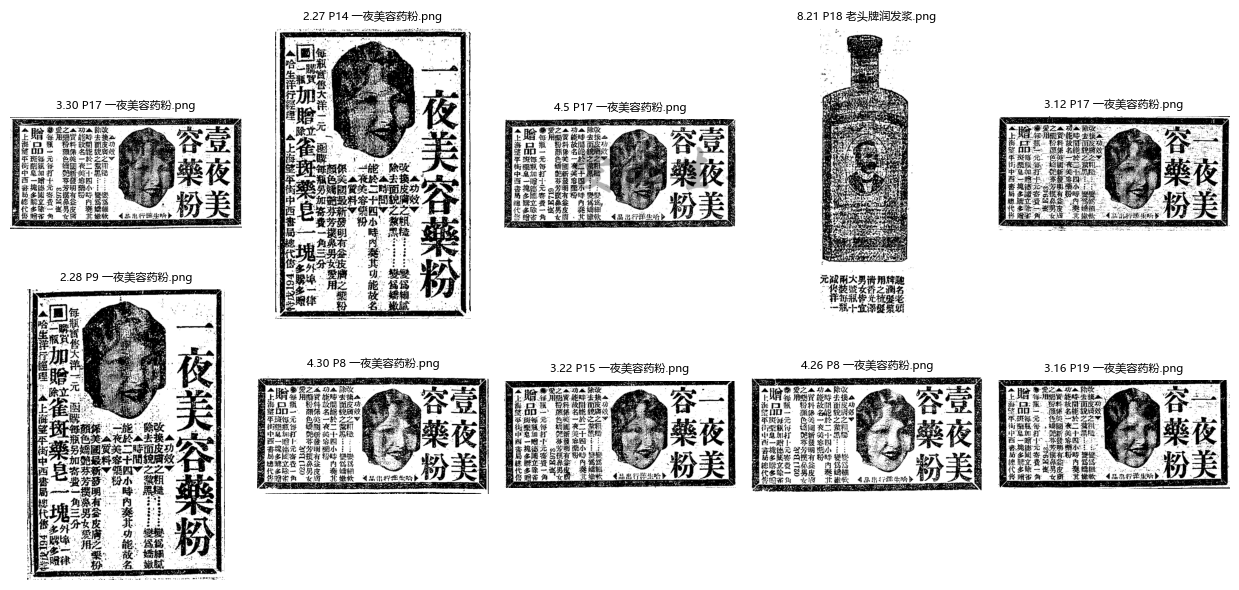


Cluster 1 (size: 23)


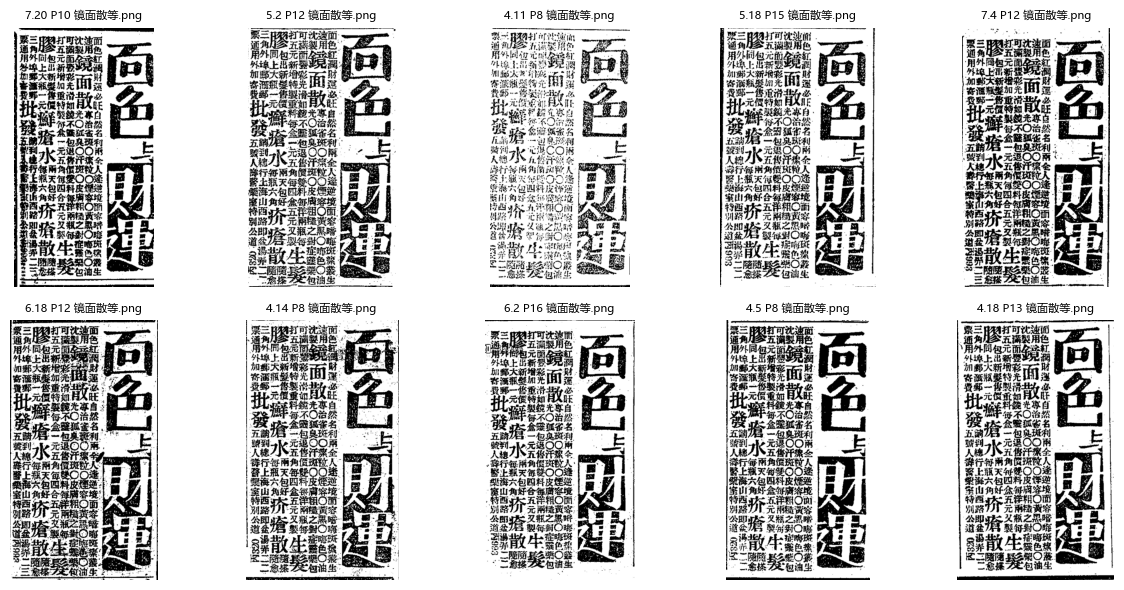


Cluster 2 (size: 14)


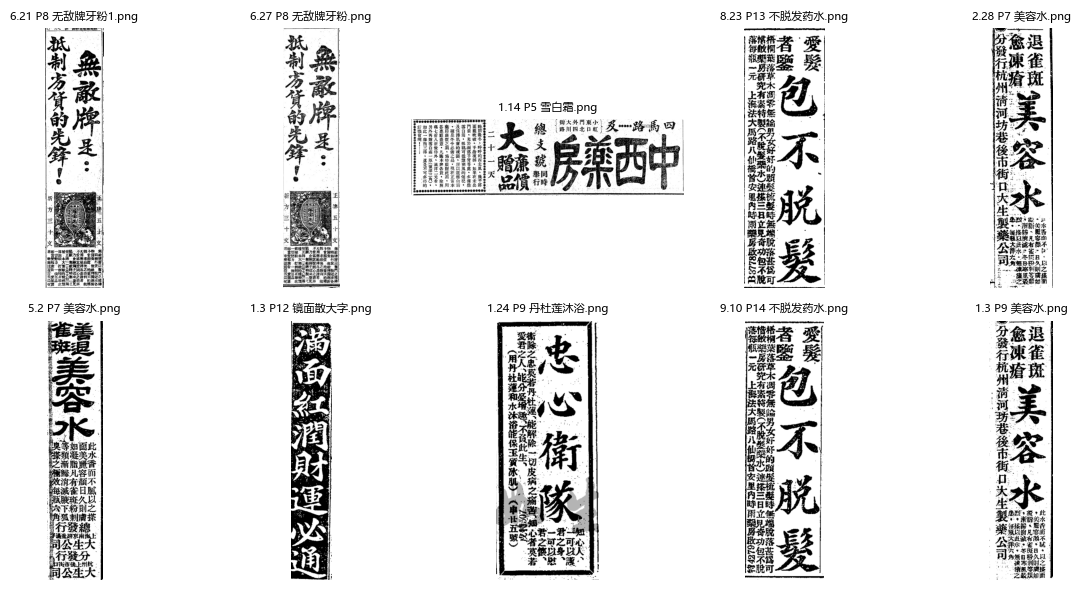


Cluster 3 (size: 11)


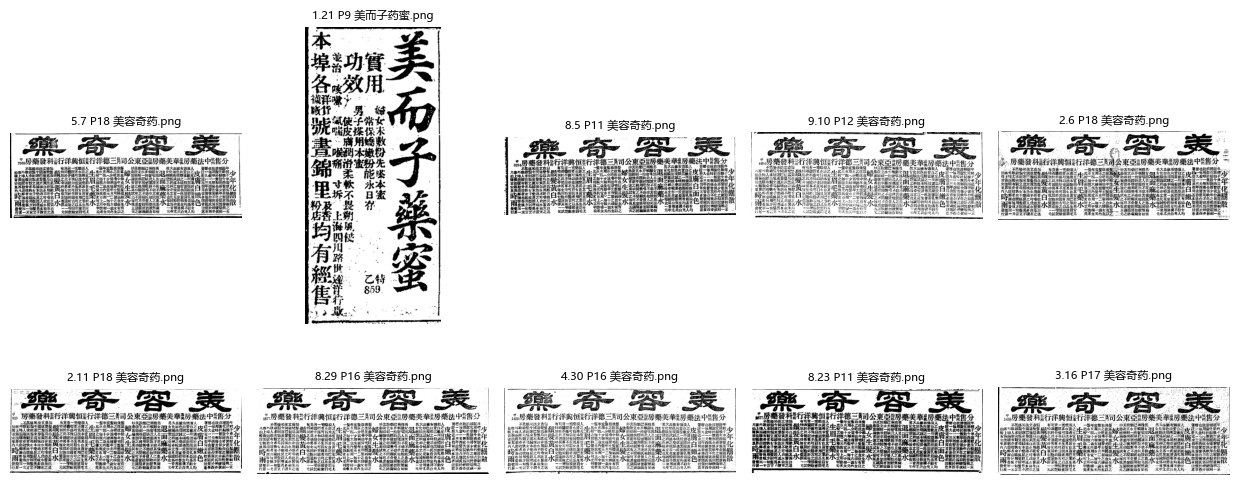


Cluster 4 (size: 30)


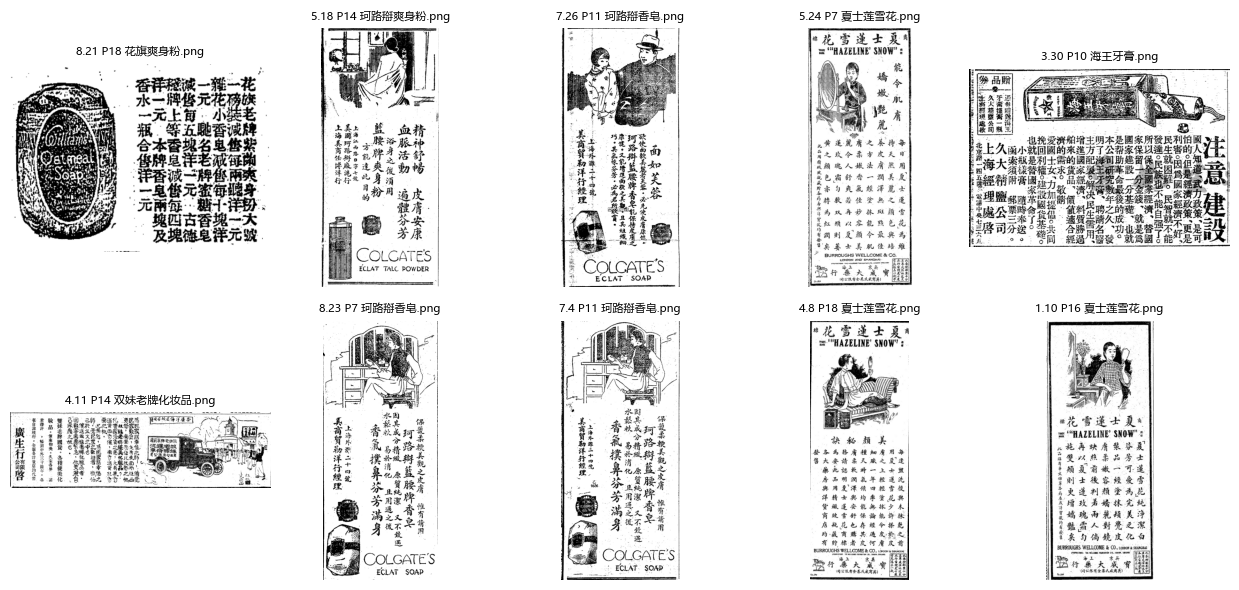


Cluster 5 (size: 24)


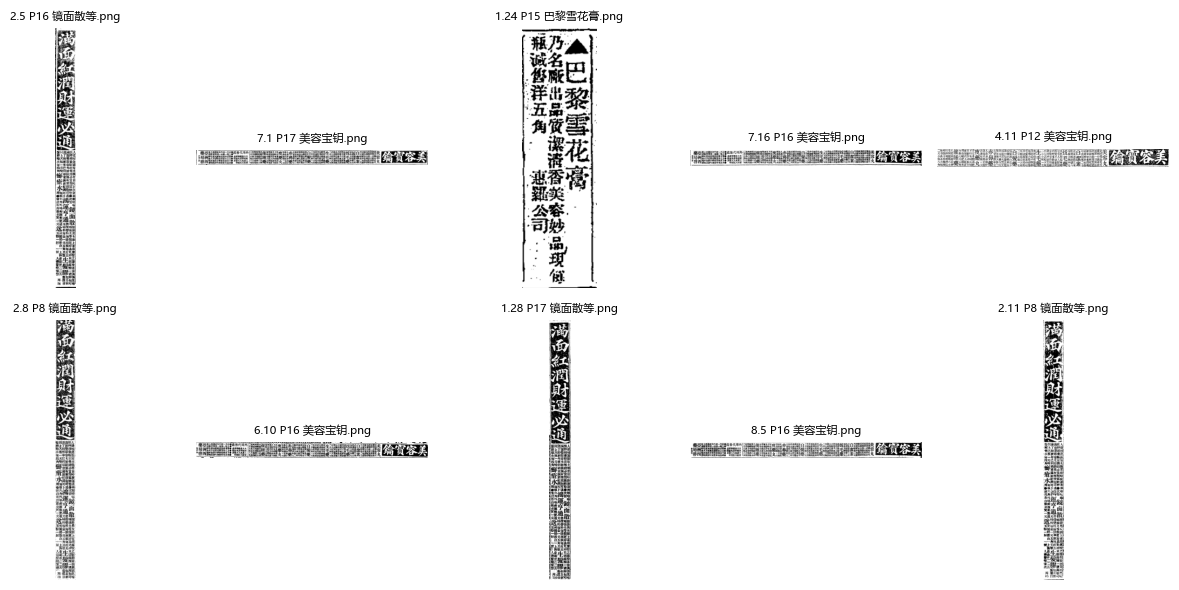


Cluster 6 (size: 12)


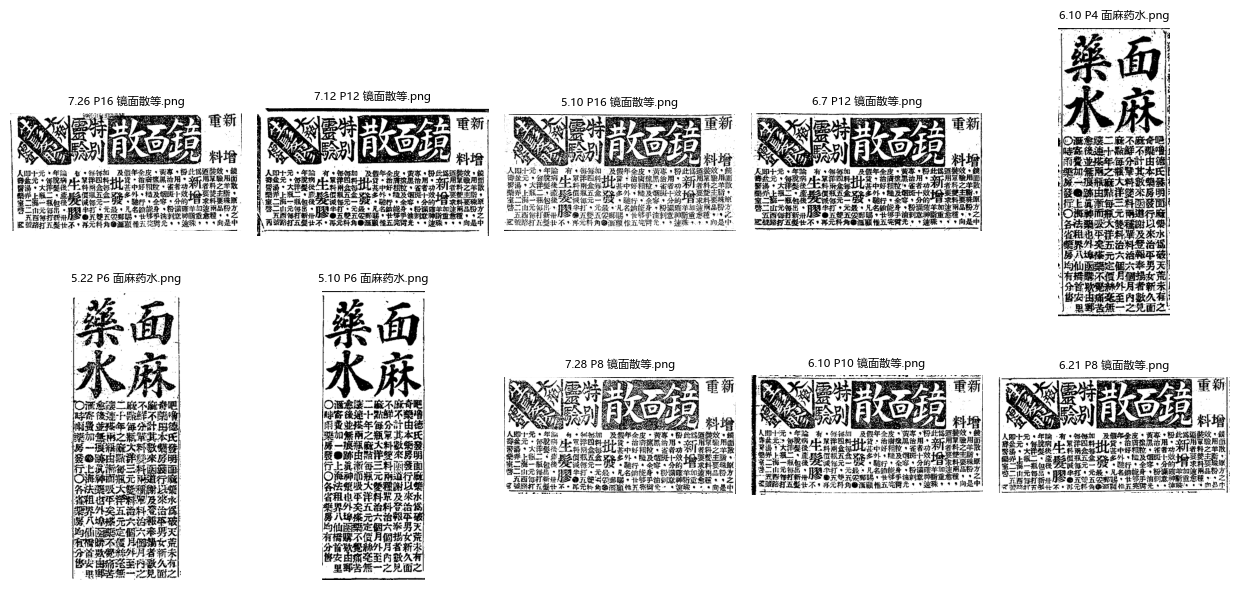


Cluster 7 (size: 14)


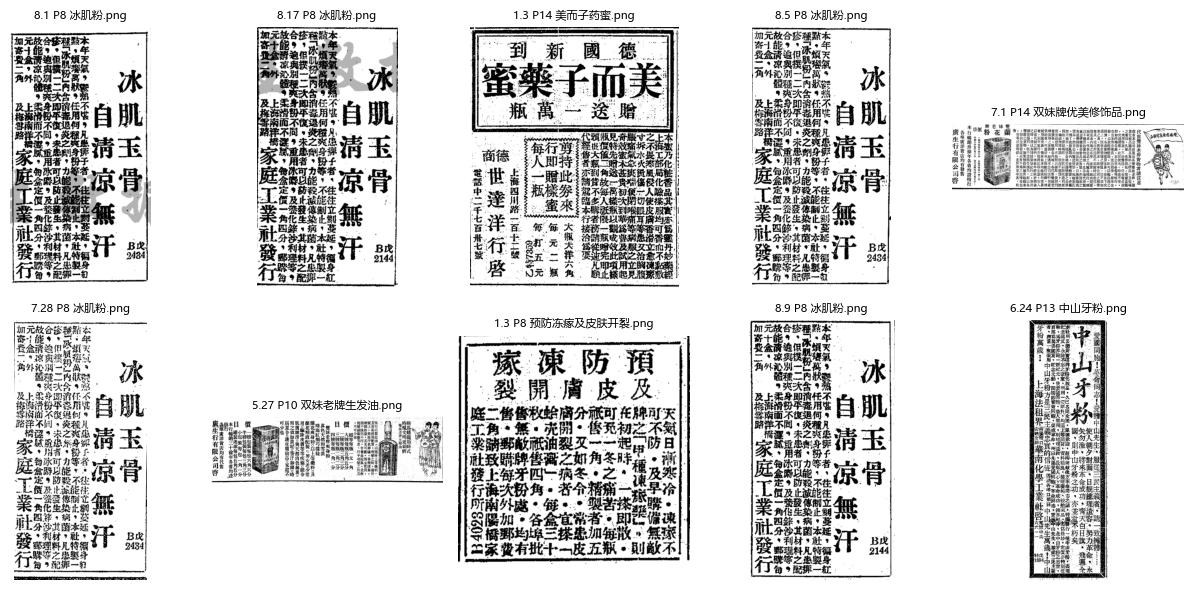


Cluster 8 (size: 11)


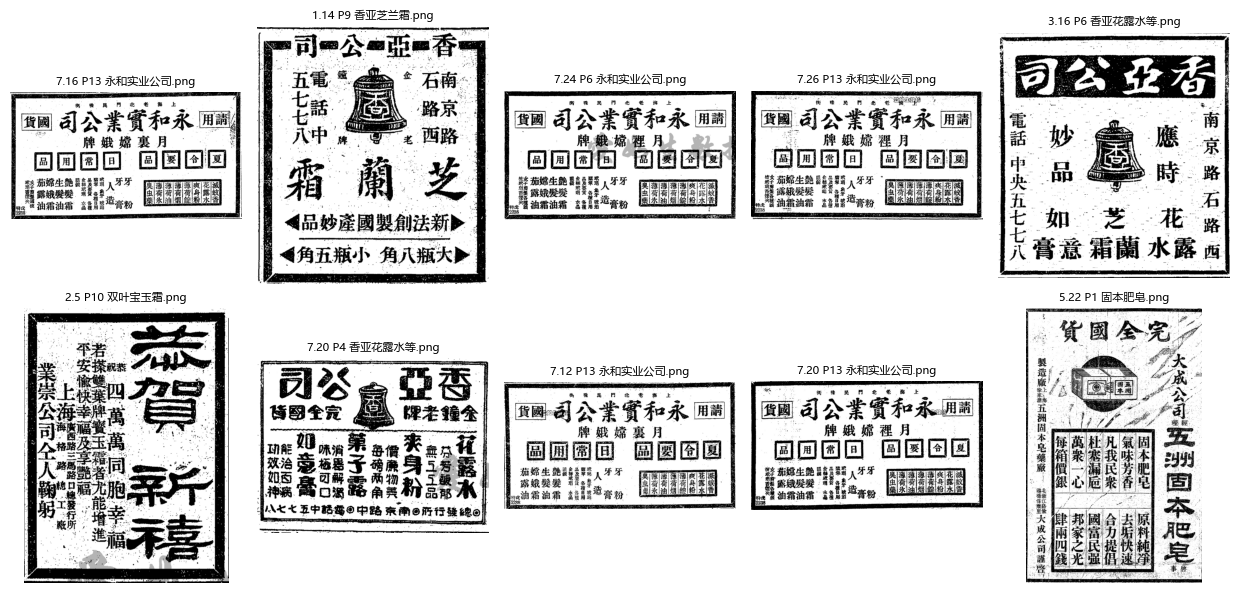


Cluster 9 (size: 18)


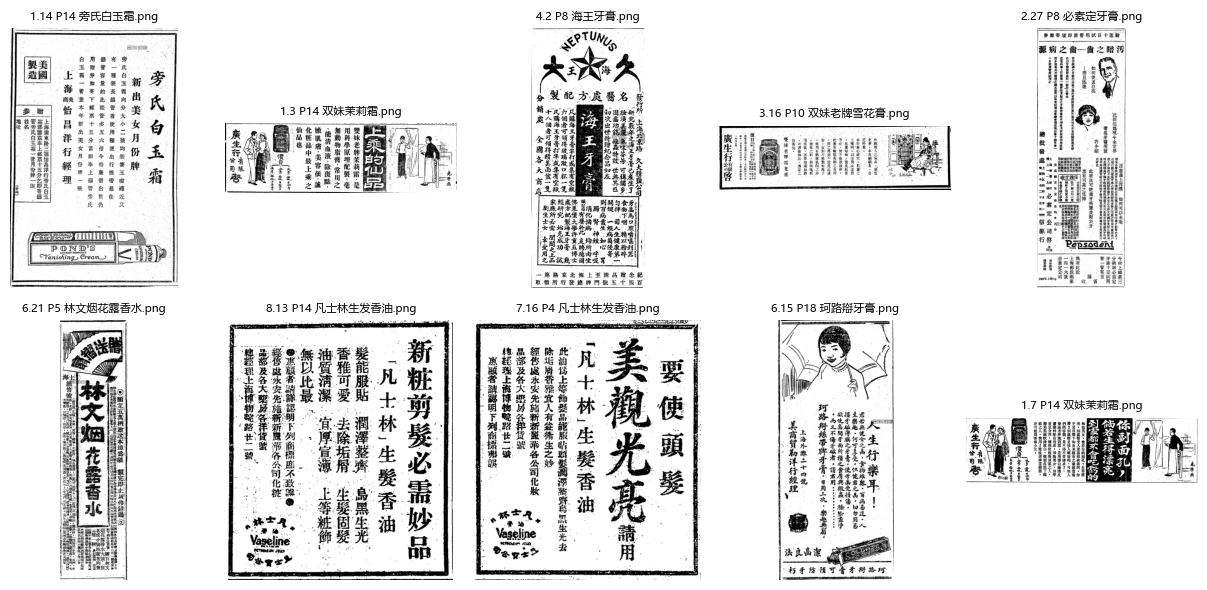


Cluster 10 (size: 16)


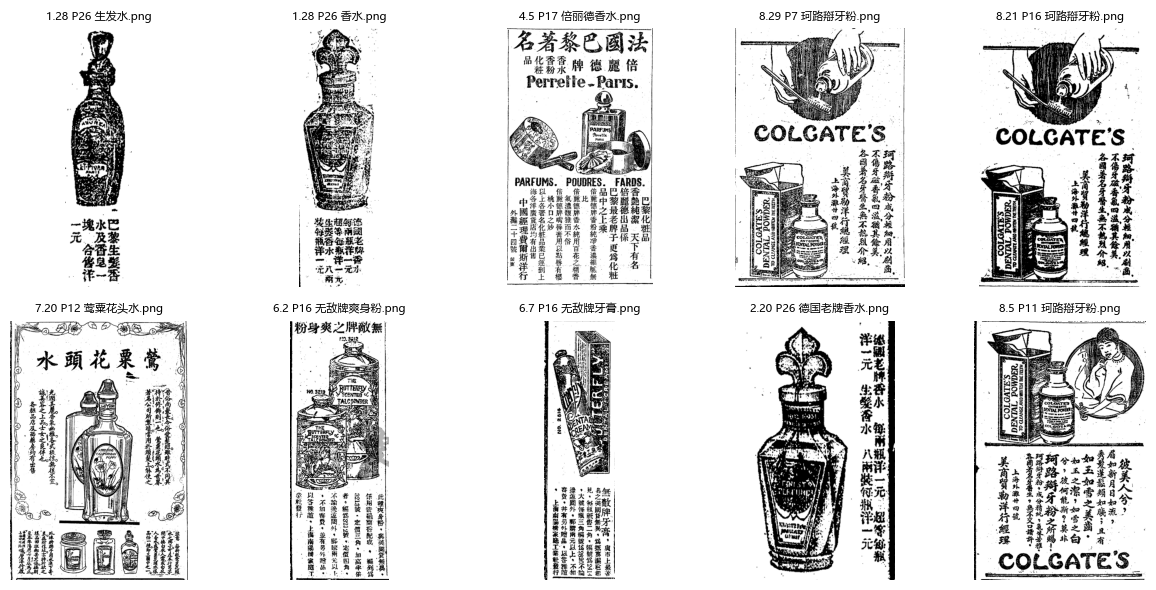


Cluster 11 (size: 39)


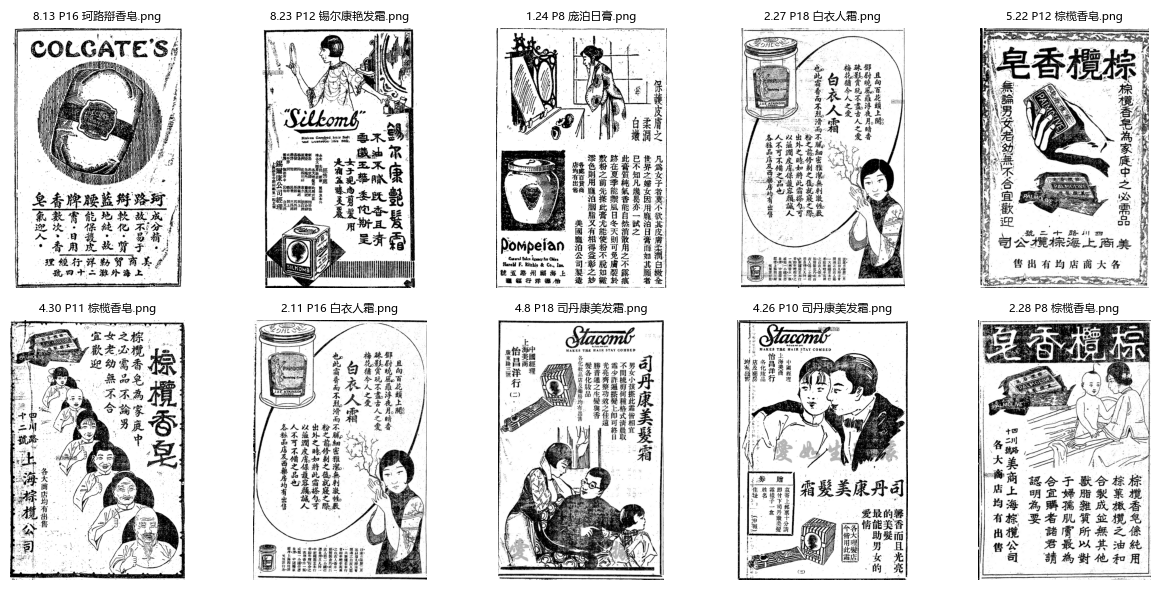

In [5]:
# Display 10 sample images from each visual cluster
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

project_root = Path('../')
n_samples = 10

for cluster_id in sorted(df_visual['cluster'].unique()):
    if cluster_id == -1:
        continue
    
    cluster_data = df_visual[df_visual['cluster'] == cluster_id]
    samples = cluster_data.sample(n=min(n_samples, len(cluster_data)), random_state=42)
    
    cluster_label = cluster_data['cluster_label'].iloc[0]
    cluster_size = len(cluster_data)
    
    print(f"\n{cluster_label} (size: {cluster_size})")
    
    n_display = min(n_samples, len(samples))
    n_rows, n_cols = 2, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.5, n_rows * 3))
    axes = axes.flatten()  # Flatten to 1D array
    
    for idx, (_, row) in enumerate(samples.iterrows()):
        if idx >= n_display:
            break
        ax = axes[idx]
        image_path = project_root / row['image_path']
        try:
            img = Image.open(image_path)
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"{row['id']}", fontsize=8)
        except Exception as e:
            ax.text(0.5, 0.5, f"Error\n{row['id']}", ha='center', va='center')
            ax.axis('off')
    
    for idx in range(n_display, n_rows * n_cols):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()


## Visual Cluster 1: Beauty as Western Modernity (The "Modern Girl" Icon)

This cluster is visually defined by a single, repeated illustration: the face of a Western (or heavily Westernized) woman. This visual strategy is central to how the product, "一夜美容药粉" (One-Night Beauty Medicine Powder), constructs its ideal.

### Visual Strategies

* **Dominant Iconography:** The repeated use of a woman's face with the quintessential 1920s **"flapper" hairstyle** (a short, waved bob).
* **Key Features:** This icon has large, direct eyes and heavily defined, dark "Cupid's bow" lips. She represents a stark break from traditional Chinese aesthetic ideals.
* **Icon as Brand:** This woman's face *is* the brand. It functions as a powerful, non-textual logo, instantly associating the product with the "look" it sells.
* **Outlier Analysis (The Bottle):** The presence of the bottle (8.21 P18), which features an illustrated portrait of a Western man, suggests the clustering logic. The cluster's visual theme is the **use of an illustrated Western-style portrait** as the primary signifier of a product's modern, foreign-associated quality.

### Construction of "Beauty"

* **Beauty = Modernity:** Beauty is visually defined as being **modern, cosmopolitan, and Western**.
* **Aspirational Ideal:** The flapper icon is presented as the aspirational goal. The product ("One-Night" powder) is the tool to achieve this specific, modern "look" and identity.
* **Aesthetic Break:** This ideal rejects traditional notions of demure, modest beauty in favor of a public, stylish, and bold aesthetic.

### Mediation of "Femininity"

* **The "Modern Girl" (摩登女郎):** This cluster is a prime example of the construction and mediation of the "Modern Girl" archetype.
* **New Feminine Identity:** Femininity is presented as public, fashionable, and (supposedly) "liberated." This woman is not domestic; she is a participant in the new urban social sphere.

### Context (Semi-Colonial Shanghai)

* **Commodification of an Archetype:** This is a perfect artifact of semi-colonial Shanghai. The ads took the "Modern Girl"—a major, and often controversial, cultural figure—and commodified her, selling her identity in a bottle.
* **Western Gaze:** The use of a Western face to sell beauty products to a Chinese audience highlights the aspirational power and cultural dominance of Western ideals in the semi-colonial context.

## Visual Cluster 4: Beauty as Modern, Westernized Routine

This cluster is visually unified by its use of **Western-style line-drawing illustrations** depicting scenes of **modern, domestic life.** It moves the site of beauty from a public icon (like the flapper in Cluster 1) to the private, modern home.

### Visual Strategies

* **Vignettes of Modern Life:** The ads show people (both men and women) in modern, private settings: a woman at her vanity, a man at his desk, a person on a chaise lounge.
* **Western Illustration Style:** Employs a realistic, shaded line-drawing style common in European and American advertising of the period.
* **Prominent Western Branding:** Features major international brands, with English names often displayed as prominently as the Chinese ("COLGATE'S," "'HAZELINE' SNOW," "Palmolive").
* **Focus on Hygiene & Self-Care:** The illustrations visually link the products (soap, snow cream, toothbrushes) to daily routines of hygiene and self-care.
* **Symbols of Modernity:** The inclusion of the "Shuangmei" (双妹) ad, with its illustration of a *delivery truck*, is a key insight. It visually associates this Chinese brand with the same modern, Western concepts of logistics, industry, and commerce as its foreign competitors.

### Construction of "Beauty"

* **Beauty as a Daily Ritual:** Beauty is constructed not as a "cure" or a "miracle" (like the text-based clusters), but as the result of a *consistent, daily routine* of modern hygiene.
* **Beauty as Private & Domestic:** The visual ideal is achieved within the new, modern spaces of the home (the bathroom, the vanity table).
* **The Ideal:** The ideal consumer is the modern, Westernized, middle-class man or woman depicted in these domestic scenes.

### Mediation of "Femininity" (and Masculinity)

* **The Modern Homemaker/Consumer:** Femininity is mediated through the role of the modern woman managing her beauty and hygiene in her private time. This is a *modern* domesticity, focused on self-care.
* **Gender-Inclusive Modernity:** The inclusion of men (e.g., the Colgate ad with a man at his desk) is significant. It visually constructs modern hygiene and self-care as a universal, gender-inclusive value, not one limited to women.

### Context (Semi-Colonial Shanghai)

* **Importing Modern Lifestyles:** These ads are not just selling a product; they are selling *and* normalizing the Western middle-class lifestyle, including its daily habits and the private spaces (like the modern bathroom) where they occur.
* **Visual Language of Global Commerce:** This cluster demonstrates the dominance of a globalized, Western visual style in advertising. Chinese brands (like Shuangmei) adopted this same visual language to compete and signal their own modernity.

## Visual Cluster 8: Beauty as Brand Identity & Reputation

Your hypothesis is spot-on. This cluster is not visually unified by an illustration, a product, or a specific aesthetic. It is unified by a strategy that places the **brand name and corporate identity** at the very center of the visual design.

### Visual Strategies

* **Typographic Dominance:** The primary visual element is the *brand name itself*, rendered in large, bold, or highly stylized artistic fonts (e.g., "香亚公司", "固本肥皂").
* **Logo-Centric Design:** The layout is often built around a prominent corporate logo, such as the "香亚" (Xiangya) bell or the "固本" (Guben) globe. The brand mark is the hero.
* **Goodwill Advertising:** This cluster includes pure brand-building ads. The "恭贺新禧" (Happy New Year) ad is not selling a product; it is selling *goodwill* from the brand ("双叶宝玉霜") to build reputation and seasonal relevance.
* **Directory/Catalog Style:** Several ads ("永和实业公司") are minimalist, text-driven grids. This visually positions the *company* as a stable, reliable, "one-stop shop" or directory, with the brand's name and reputation being the main selling point.

### Construction of "Beauty"

* **Beauty as a "Trusted Source":** Beauty is constructed as an attribute of the *company*. The consumer is not just buying a cream, but buying the trust and reputation associated with "香亚" (Xiangya) or "永和" (Yonghe).
* **Beauty as a "Patriotic Choice":** In the "固本" (Guben) ad, the bold, nationalist text is matched by a bold, aggressive, type-centric visual. The "beauty" is in the *act* of choosing the "国货" (Guohuo) brand.

### Mediation of "Femininity"

* **The Brand-Conscious Consumer:** This strategy mediates femininity by cultivating brand loyalty. The ideal woman is positioned as a discerning consumer who aligns herself with a *brand*, demonstrating her taste, modernity, or patriotism through her choice.

### Context (Semi-Colonial Shanghai)

* **Rise of Corporate Branding:** This cluster is a perfect visual record of the rise of modern corporate branding in Shanghai. Companies are competing not just on product features, but on a more abstract level of brand recognition, reputation, and identity.
* **The "Guohuo" Visual:** The ads for Chinese brands ("固本", "双叶") show a distinct visual style—often bold, direct, and typographic—that contrasts with the illustrative, lifestyle-focused ads of foreign competitors (like in Visual Cluster 2).

## Visual Cluster 10: Beauty as Luxury Packaging & Modern Process

This cluster is visually unified by two distinct, but related, strategies. It either focuses on:
1.  The **ornate, luxurious packaging** of the product, coding it as an aesthetic object.
2.  The **process of using** the product, coding it as a modern, methodical habit.

### Visual Strategies

* **Ornate Packaging as Signifier:** A large subgroup of ads (perfumes, hair water) features highly detailed illustrations of decorative, old-world-style bottles. The *bottle's aesthetic* is the primary message, signifying luxury, prestige, and "German" (德国老牌) or "French" (Perrette-Paris) quality.
* **Brand Range (Perrette):** The "Perrette" ad visualizes luxury by displaying the *entire range* of products (jars, bottles, boxes), constructing the brand as a complete, high-end cosmetic "house."
* **Demonstration of "How-To" (Colgate):** A key subgroup (Colgate dental powder) repeatedly shows the *act of using* the product: a hand pouring the powder onto a toothbrush, or a woman at her vanity. This is a visual "how-to" guide.
* **Nationalist Brand-Line (Invincible):** The "Invincible" (无敌牌) ads show different, but visually similar, packages for different products (talc, toothpaste), visually establishing a coherent "Guohuo" (国货) brand-line.

### Construction of "Beauty"

* **Beauty as an Aesthetic Object:** Beauty is constructed as the act of owning and displaying a *beautiful object* (the ornate bottle). The product is a luxury good, and its consumption is an act of taste.
* **Beauty as a Correct Method:** The "how-to" ads construct beauty/hygiene as a *rational, modern process*. Beauty is achieved by learning and performing the correct new habit.

### Mediation of "Femininity"

* **The Connoisseur:** The (implied) female consumer is positioned as a connoisseur, one who appreciates the aesthetic of the bottle and the prestige of its Parisian or German origin.
* **The Educated Consumer:** The "how-to" ads target a "modern" woman who learns and adopts new, "scientific" methods of self-care. Her femininity is tied to her adoption of these new hygiene rituals.

### Context (Semi-Colonial Shanghai)

* **Instructional Advertising:** The "how-to" ads are critical artifacts. They show advertisers actively *teaching* a mass market how to use novel products like dental powder, visually creating the new bodily habits required by modern hygiene.
* **Competing Signifiers of Luxury:** This cluster shows a direct competition between different signifiers of "prestige": "French" (Perrette), "German" (德国老牌), and traditional "elegance" (the ornate bottles).

## Visual Cluster 11: Beauty as an Instructional, Localized Modernity

This cluster is visually unified by its **instructional nature** and its depiction of a localized, **"Sino-modern" consumer.** Unlike clusters that use a generic Western flapper icon, these ads often show consumers in modern *Chinese* attire (like the cheongsam) actively performing new, Western-style beauty routines.

### Visual Strategies

* **Instructional Vignettes:** Many ads visually demonstrate the *act* of using the product: a hand brushing teeth (Colgate), a woman combing her hair (SilKomb), or a woman applying cream (Stacomb).
* **Modeling New Habits:** The ads function as "how-to" guides, *teaching* the consumer the correct method for these novel products.
* **Localization of the "Modern Girl":** The ads for "White Clothed Man" cream (白衣人霜) and "Stacomb" (4.8 P18) prominently feature women in stylish *cheongsams*. This creates a distinctly *Chinese* version of the modern woman.
* **Visualizing the "Choice":** The "Camphor Soap" (樟脑香皂) ad is a key example, showing a woman with two hairstyles (a traditional bun vs. a modern bob), explicitly positioning the product as the tool to achieve the modern look.
* **The "Modern Couple":** The "Stacomb" ads are significant for showing men and women *together*, framing beauty and hygiene as a shared, mutual practice for a modern social life.

### Construction of "Beauty"

* **Beauty as a Learned Skill:** Beauty is constructed not as an innate quality, but as a *skill* and a *habit* to be learned by adopting new products and methods.
* **The "Sino-Modern" Ideal:** The visual ideal is not a simple copy of the West, but a *hybrid*—a woman who is both fashionably modern (short hair, cosmetics) and identifiably Chinese (wearing a cheongsam).

### Mediation of "Femininity"

* **The "Modern" Chinese Woman:** Mediates a new, specifically Shanghainese femininity that blends global trends with a distinct local identity.
* **The Social Partner:** Femininity is also shown as part of a modern "couple," where women and men are mutually invested in grooming and appearance for a mixed-gender social world.

### Context (Semi-Colonial Shanghai)

* **Hybrid Modernity:** This cluster is the *perfect* visual representation of Shanghai's hybrid, semi-colonial culture. It is not just importing Western ideals but actively *adapting, localizing, and teaching* them.
* **Advertising as Education:** These ads act as "how-to" manuals, teaching a mass audience the new, specific bodily practices required by a modern, consumerist lifestyle.

## Conclusion

Based on the analysis of the visual clusters, the advertisements in *Shun Pao* in 1927 did not construct a single, unified notion of beauty or femininity. Instead, they created a dynamic **visual marketplace of competing modernities**, where different visual strategies were used to sell different versions of the "modern self."

These strategies can be grouped into three primary visual arguments:

### 1. The Argument for the "Modern Ideal" (The Look)

This strategy focused on the *human figure*, presenting different aspirational archetypes for the consumer to emulate.

* **The Western Archetype (Cluster 1):** This was the most direct strategy, using the **Western "Flapper" icon** as the brand logo. It visually equated beauty with a foreign, bold, and cosmopolitan "look," breaking from traditional aesthetics.
* **The "Sino-Modern" Hybrid (Cluster 11):** This was the *localization* of modernity. It featured women in modern **Chinese attire (like the cheongsam)**, creating a hybrid, specifically Shanghainese ideal that blended global trends with a distinct local identity.
* **The Domestic Consumer (Cluster 2):** This strategy shifted the ideal from a public icon to a private individual. It used Western-style line drawings to depict men and women in **modern home settings** (at a vanity, at a desk), constructing the ideal as a private, middle-class, and hygienic lifestyle.

### 2. The Argument for the "Modern Process" (The Habit)

This strategy constructed beauty as a *rational, learned skill*, with the ads functioning as "how-to" manuals for new, modern bodily practices.

* **Instructional Vignettes (Clusters 10 & 11):** These ads visually demonstrated the *act* of using a product: a hand pouring dental powder, a woman applying cream, or a child brushing teeth. They were **"how-to" guides** that taught consumers the correct, "scientific" methods.
* **Visualizing "Proof" (Cluster 9):** The use of **"before-and-after"** portraits was another instructional strategy, visually "proving" the product's transformative power and framing beauty as a solvable, technical problem.

### 3. The Argument for the "Modern Object" (The Brand/Product)

This strategy shifted the focus from the consumer to the *commodity itself*, training viewers to be brand-conscious shoppers.

* **The "Product as Hero" (Cluster 9):** This strategy centered on a large, detailed illustration of the **product's unique packaging** (the tube, the jar). The goal was to build *shelf-recognition* and make the tangible object the hero of the ad.
* **The Brand as Authority (Cluster 8):** Here, the brand *was* the visual. These ads were dominated by **bold, stylized typography and corporate logos**, building reputation and loyalty to the company, not just a single product.
* **The Package as Prestige (Cluster 10):** This strategy used illustrations of **ornate, luxurious bottles** (often coded as "French" or "German") to construct the product as an *aesthetic object*. Beauty was equated with elite taste and the prestige of owning the luxury item.